In [24]:
# セル0: 画像保存用ディレクトリ作成（最初に実行）
import os
os.makedirs('images', exist_ok=True)
print('✅ imagesディレクトリ作成完了')

✅ imagesディレクトリ作成完了


In [25]:
# ========================================
# Task40: Kaggle教育データ詳細分析（EDA）
# 作成日: 2025-10-21
# 目的: データ理解とプロジェクト2への示唆
# ========================================

# セル1: ライブラリインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# グラフ設定
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")
sns.set_palette("husl")

print('✅ ライブラリインポート完了')

✅ ライブラリインポート完了


In [26]:
# セル2: Google Driveマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# セル3: データ読み込み
# ファイルをアップロードする方法（簡単）
from google.colab import files

print('CSVファイルをアップロードしてください...')
uploaded = files.upload()

# アップロードされたファイル名を取得
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print(f'\n✅ データ読み込み完了')
print(f'行数: {len(df)}')
print(f'列数: {len(df.columns)}')

CSVファイルをアップロードしてください...


Saving StudentsPerformance.csv to StudentsPerformance (2).csv

✅ データ読み込み完了
行数: 1000
列数: 8


In [28]:
# セル4: データ構造の確認
print('=' * 60)
print('データ構造の確認')
print('=' * 60)

print(f'\n【基本情報】')
print(f'行数: {len(df):,}')
print(f'列数: {len(df.columns)}')

print(f'\n【列名】')
for i, col in enumerate(df.columns, 1):
    print(f'{i}. {col}')

print(f'\n【データ型】')
print(df.dtypes)

print(f'\n【最初の5行】')
df.head()

データ構造の確認

【基本情報】
行数: 1,000
列数: 8

【列名】
1. gender
2. race/ethnicity
3. parental level of education
4. lunch
5. test preparation course
6. math score
7. reading score
8. writing score

【データ型】
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

【最初の5行】


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
# セル5: データ品質チェック
print('=' * 60)
print('データ品質チェック')
print('=' * 60)

print(f'\n【欠損値】')
null_counts = df.isnull().sum()
print(null_counts)
print(f'\n✅ 欠損値合計: {null_counts.sum()}件')

print(f'\n【重複行】')
duplicates = df.duplicated().sum()
print(f'重複行数: {duplicates}')

print(f'\n【ユニーク値の数】')
for col in df.columns:
    print(f'{col}: {df[col].nunique()}個')

データ品質チェック

【欠損値】
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

✅ 欠損値合計: 0件

【重複行】
重複行数: 0

【ユニーク値の数】
gender: 2個
race/ethnicity: 5個
parental level of education: 6個
lunch: 2個
test preparation course: 2個
math score: 81個
reading score: 72個
writing score: 77個


In [30]:
# セル6: カテゴリカル変数の分布
print('=' * 60)
print('カテゴリカル変数の分布')
print('=' * 60)

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education',
                    'lunch', 'test preparation course']

for col in categorical_cols:
    print(f'\n【{col}】')
    value_counts = df[col].value_counts()
    for val, count in value_counts.items():
        pct = count / len(df) * 100
        print(f'  {val}: {count:>4} ({pct:>5.1f}%)')

カテゴリカル変数の分布

【gender】
  female:  518 ( 51.8%)
  male:  482 ( 48.2%)

【race/ethnicity】
  group C:  319 ( 31.9%)
  group D:  262 ( 26.2%)
  group B:  190 ( 19.0%)
  group E:  140 ( 14.0%)
  group A:   89 (  8.9%)

【parental level of education】
  some college:  226 ( 22.6%)
  associate's degree:  222 ( 22.2%)
  high school:  196 ( 19.6%)
  some high school:  179 ( 17.9%)
  bachelor's degree:  118 ( 11.8%)
  master's degree:   59 (  5.9%)

【lunch】
  standard:  645 ( 64.5%)
  free/reduced:  355 ( 35.5%)

【test preparation course】
  none:  642 ( 64.2%)
  completed:  358 ( 35.8%)


In [31]:
# セル7: 数値変数の統計
print('=' * 60)
print('数値変数の統計')
print('=' * 60)

score_cols = ['math score', 'reading score', 'writing score']

print('\n【記述統計量】')
stats = df[score_cols].describe().round(2)
print(stats)

# 総合平均スコアを計算
df['avg_score'] = df[score_cols].mean(axis=1)
print(f'\n【総合平均スコア】')
print(f'平均: {df["avg_score"].mean():.2f}')
print(f'標準偏差: {df["avg_score"].std():.2f}')
print(f'最小値: {df["avg_score"].min():.2f}')
print(f'最大値: {df["avg_score"].max():.2f}')

数値変数の統計

【記述統計量】
       math score  reading score  writing score
count     1000.00        1000.00        1000.00
mean        66.09          69.17          68.05
std         15.16          14.60          15.20
min          0.00          17.00          10.00
25%         57.00          59.00          57.75
50%         66.00          70.00          69.00
75%         77.00          79.00          79.00
max        100.00         100.00         100.00

【総合平均スコア】
平均: 67.77
標準偏差: 14.26
最小値: 9.00
最大値: 100.00


✅ images/score_distribution.png 保存完了 (255622 bytes)


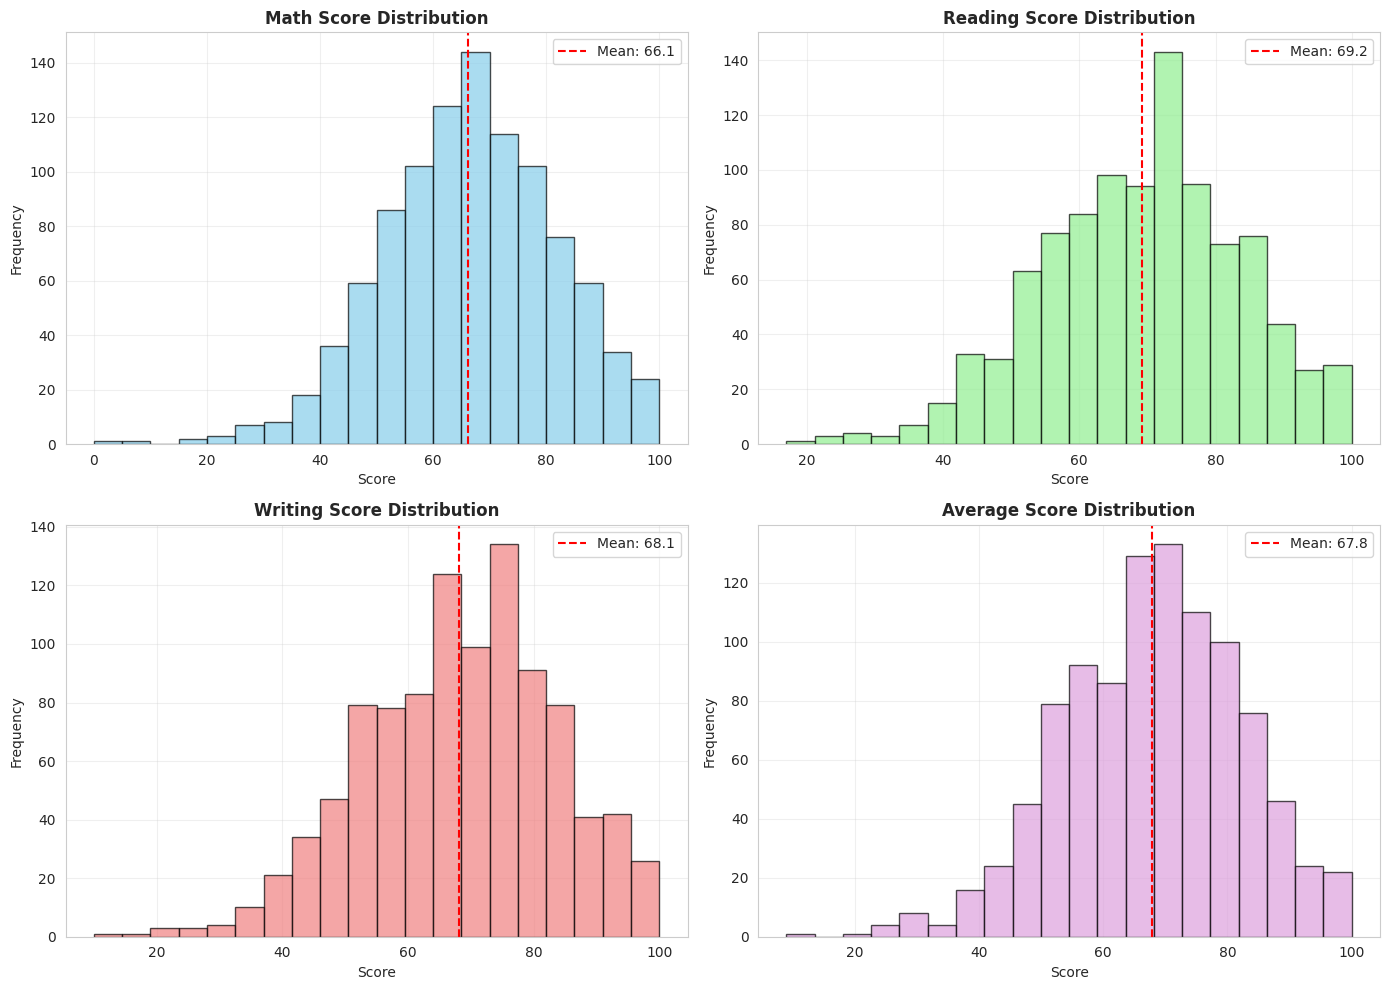

In [32]:
# セル8: スコア分布の可視化
import os
os.makedirs('images', exist_ok=True)  # ← 追加

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 数学
axes[0, 0].hist(df['math score'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(df['math score'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df["math score"].mean():.1f}')
axes[0, 0].set_title('Math Score Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 読解
axes[0, 1].hist(df['reading score'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0, 1].axvline(df['reading score'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df["reading score"].mean():.1f}')
axes[0, 1].set_title('Reading Score Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 作文
axes[1, 0].hist(df['writing score'], bins=20, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1, 0].axvline(df['writing score'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df["writing score"].mean():.1f}')
axes[1, 0].set_title('Writing Score Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 総合
axes[1, 1].hist(df['avg_score'], bins=20, edgecolor='black', alpha=0.7, color='plum')
axes[1, 1].axvline(df['avg_score'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df["avg_score"].mean():.1f}')
axes[1, 1].set_title('Average Score Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()

# ✅ plt.show()の前に保存
filepath = 'images/score_distribution.png'
plt.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
print(f'✅ {filepath} 保存完了 ({os.path.getsize(filepath)} bytes)')

plt.show()

性別別の平均スコア

【平均スコア】
        math score  reading score  writing score  avg_score
gender                                                     
female       63.63          72.61          72.47      69.57
male         68.73          65.47          63.31      65.84
✅ images/gender_comparison.png 保存完了 (102146 bytes)


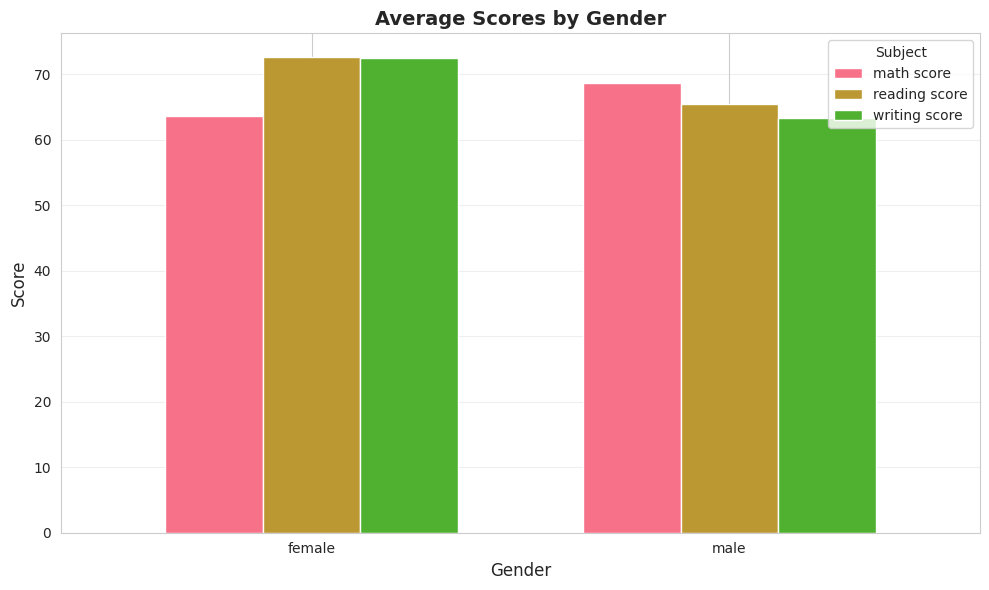


【性別差】
math score: 男性 +5.10点
reading score: 男性 -7.14点
writing score: 男性 -9.16点


In [33]:
# セル9: 性別別の平均スコア
print('=' * 60)
print('性別別の平均スコア')
print('=' * 60)

gender_stats = df.groupby('gender')[score_cols + ['avg_score']].mean().round(2)
print('\n【平均スコア】')
print(gender_stats)

# グラフ化
fig, ax = plt.subplots(figsize=(10, 6))
gender_stats[score_cols].plot(kind='bar', ax=ax, width=0.7)
ax.set_title('Average Scores by Gender', fontsize=14, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='Subject', fontsize=10)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()

# ✅ plt.show()の前に保存
filepath = 'images/gender_comparison.png'
plt.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
print(f'✅ {filepath} 保存完了 ({os.path.getsize(filepath)} bytes)')

plt.show()

# 差分の計算
print('\n【性別差】')
male_avg = df[df['gender']=='male'][score_cols].mean()
female_avg = df[df['gender']=='female'][score_cols].mean()
diff = male_avg - female_avg
for col in score_cols:
    sign = '+' if diff[col] > 0 else ''
    print(f'{col}: 男性 {sign}{diff[col]:.2f}点')

テスト準備コース別の平均スコア

【平均スコア】
                         math score  reading score  writing score  avg_score
test preparation course                                                     
completed                     69.70          73.89          74.42      72.67
none                          64.08          66.53          64.50      65.04
✅ images/test_prep_effect.png 保存完了 (117206 bytes)


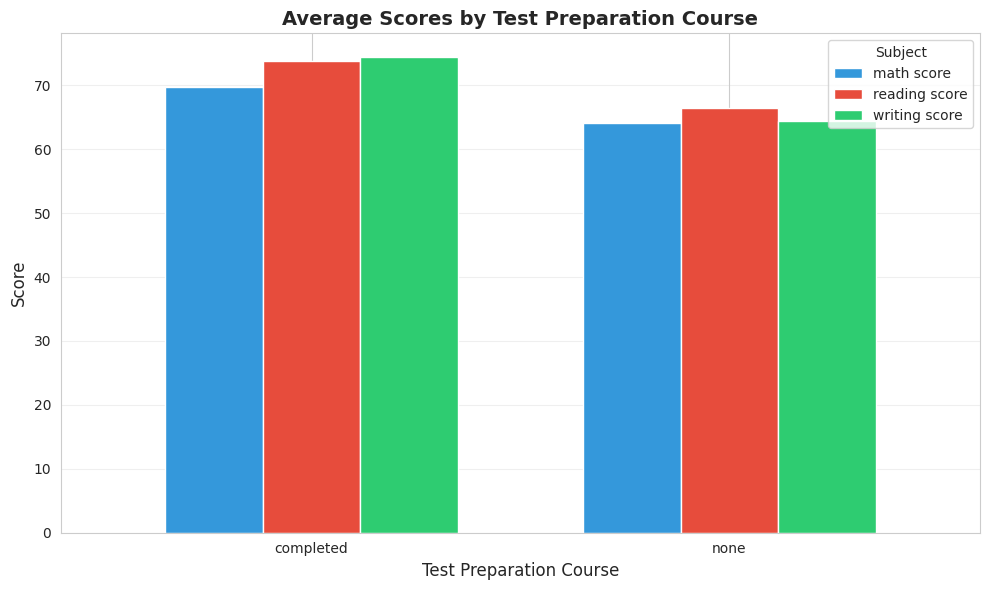


✅ テスト準備コースの効果: +7.63点
✅ 受講率: 35.8%


In [34]:
# セル10: テスト準備コース別の平均スコア
print('=' * 60)
print('テスト準備コース別の平均スコア')
print('=' * 60)

prep_stats = df.groupby('test preparation course')[score_cols + ['avg_score']].mean().round(2)
print('\n【平均スコア】')
print(prep_stats)

# グラフ化
fig, ax = plt.subplots(figsize=(10, 6))
prep_stats[score_cols].plot(kind='bar', ax=ax, width=0.7, color=['#3498db', '#e74c3c', '#2ecc71'])
ax.set_title('Average Scores by Test Preparation Course', fontsize=14, fontweight='bold')
ax.set_xlabel('Test Preparation Course', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='Subject', fontsize=10)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()

# ✅ plt.show()の前に保存
filepath = 'images/test_prep_effect.png'
plt.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
print(f'✅ {filepath} 保存完了 ({os.path.getsize(filepath)} bytes)')

plt.show()

# 効果の計算
effect_avg = prep_stats.loc['completed', 'avg_score'] - prep_stats.loc['none', 'avg_score']
print(f'\n✅ テスト準備コースの効果: +{effect_avg:.2f}点')

# 受講率
completion_rate = (df['test preparation course'] == 'completed').sum() / len(df) * 100
print(f'✅ 受講率: {completion_rate:.1f}%')

パフォーマンス区分

【パフォーマンス区分】
High Performer: 198人 (19.8%)
Medium Performer: 517人 (51.7%)
Low Performer: 285人 (28.5%)
✅ images/performance_category.png 保存完了 (133102 bytes)


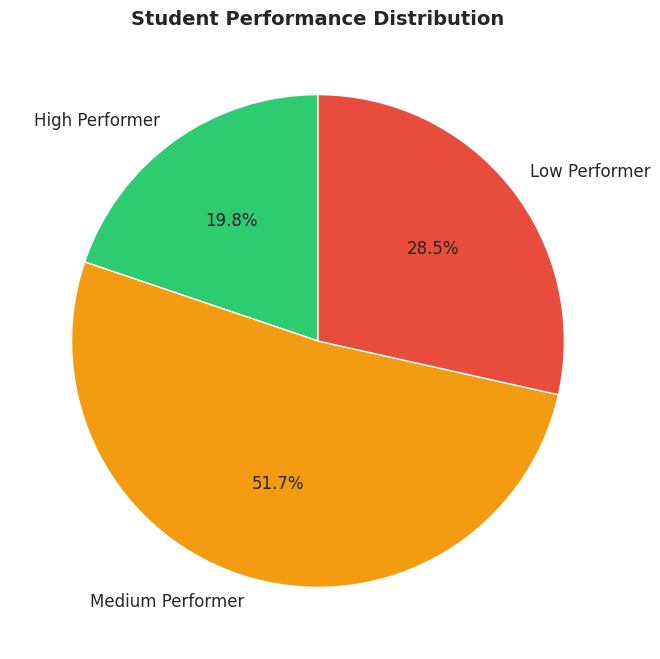

In [35]:
# セル11: パフォーマンス区分
print('=' * 60)
print('パフォーマンス区分')
print('=' * 60)

# カテゴリ分類
def categorize_performance(avg):
    if avg >= 80:
        return 'High Performer'
    elif avg >= 60:
        return 'Medium Performer'
    else:
        return 'Low Performer'

df['performance_category'] = df['avg_score'].apply(categorize_performance)

# 集計
category_counts = df['performance_category'].value_counts()
category_order = ['High Performer', 'Medium Performer', 'Low Performer']
category_counts = category_counts.reindex(category_order)

print('\n【パフォーマンス区分】')
for cat, count in category_counts.items():
    pct = count / len(df) * 100
    print(f'{cat}: {count}人 ({pct:.1f}%)')

# 円グラフ
colors = ['#2ecc71', '#f39c12', '#e74c3c']
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
       colors=colors, startangle=90, textprops={'fontsize': 12})
ax.set_title('Student Performance Distribution', fontsize=14, fontweight='bold')

# ✅ plt.show()の前に保存
filepath = 'images/performance_category.png'
plt.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
print(f'✅ {filepath} 保存完了 ({os.path.getsize(filepath)} bytes)')

plt.show()

In [36]:
# セル12: 主要インサイト
print('=' * 60)
print('主要インサイト')
print('=' * 60)

print('\n【1. データ品質】')
print(f'✅ 欠損値: なし')
print(f'✅ 重複: なし')
print(f'✅ 総学生数: {len(df):,}人')

print('\n【2. 全体統計】')
print(f'✅ 数学平均: {df["math score"].mean():.2f}点')
print(f'✅ 読解平均: {df["reading score"].mean():.2f}点')
print(f'✅ 作文平均: {df["writing score"].mean():.2f}点')
print(f'✅ 総合平均: {df["avg_score"].mean():.2f}点')

print('\n【3. 性別差】')
male_math = df[df['gender']=='male']['math score'].mean()
female_math = df[df['gender']=='female']['math score'].mean()
male_reading = df[df['gender']=='male']['reading score'].mean()
female_reading = df[df['gender']=='female']['reading score'].mean()
print(f'✅ 男性の数学が+{(male_math - female_math):.2f}点高い')
print(f'✅ 女性の読解が+{(female_reading - male_reading):.2f}点高い')

print('\n【4. テスト準備コースの効果】')
print(f'✅ 効果: +{effect_avg:.2f}点（約{(effect_avg/prep_stats.loc["none", "avg_score"]*100):.1f}%向上）')
print(f'✅ 受講率: {completion_rate:.1f}%（まだ低い）')

print('\n【5. 要支援学生】')
low_count = (df['performance_category']=='Low Performer').sum()
print(f'✅ Low Performer: {low_count}人 ({low_count/len(df)*100:.1f}%)')
print(f'✅ 約3割の学生が平均60点未満で要支援')

主要インサイト

【1. データ品質】
✅ 欠損値: なし
✅ 重複: なし
✅ 総学生数: 1,000人

【2. 全体統計】
✅ 数学平均: 66.09点
✅ 読解平均: 69.17点
✅ 作文平均: 68.05点
✅ 総合平均: 67.77点

【3. 性別差】
✅ 男性の数学が+5.10点高い
✅ 女性の読解が+7.14点高い

【4. テスト準備コースの効果】
✅ 効果: +7.63点（約11.7%向上）
✅ 受講率: 35.8%（まだ低い）

【5. 要支援学生】
✅ Low Performer: 285人 (28.5%)
✅ 約3割の学生が平均60点未満で要支援


In [37]:
# セル13: プロジェクト2への示唆
print('=' * 60)
print('プロジェクト2（就労支援）への示唆')
print('=' * 60)

print('\n【教育データから学べること】')
print('1. 属性 × 介入 × 成果の構造')
print('   - 教育: 属性（性別・学歴） × 介入（テスト準備） × 成果（スコア）')
print('   - 就労: 属性（年齢・障害） × 介入（訓練） × 成果（出席率・就職率）')

print('\n2. パフォーマンス区分の有効性')
print('   - High/Medium/Lowの3段階で要支援者を明確化')
print('   - 就労支援でも同様の区分が使える')

print('\n3. 効果測定の重要性')
print(f'   - テスト準備コースの効果: +{effect_avg:.2f}点')
print('   - 訓練プログラムの効果も同様に測定可能')

print('\n4. 可視化の重要性')
print('   - ヒストグラム: 分布の把握')
print('   - 棒グラフ: 属性別比較')
print('   - 円グラフ: 構成比の理解')

print('\n【次のステップ（Week 2）】')
print('✅ dbtでこの分析をモデル化')
print('✅ Looker Studioでダッシュボード作成')
print('✅ 就労支援データ（あゆみ）でも同様の分析')

プロジェクト2（就労支援）への示唆

【教育データから学べること】
1. 属性 × 介入 × 成果の構造
   - 教育: 属性（性別・学歴） × 介入（テスト準備） × 成果（スコア）
   - 就労: 属性（年齢・障害） × 介入（訓練） × 成果（出席率・就職率）

2. パフォーマンス区分の有効性
   - High/Medium/Lowの3段階で要支援者を明確化
   - 就労支援でも同様の区分が使える

3. 効果測定の重要性
   - テスト準備コースの効果: +7.63点
   - 訓練プログラムの効果も同様に測定可能

4. 可視化の重要性
   - ヒストグラム: 分布の把握
   - 棒グラフ: 属性別比較
   - 円グラフ: 構成比の理解

【次のステップ（Week 2）】
✅ dbtでこの分析をモデル化
✅ Looker Studioでダッシュボード作成
✅ 就労支援データ（あゆみ）でも同様の分析


In [38]:
# セル14: 保存された画像を確認
import os
from google.colab import files

print('=' * 60)
print('保存された画像の確認')
print('=' * 60)

if os.path.exists('images'):
    image_files = sorted(os.listdir('images'))
    if image_files:
        print(f'\n✅ {len(image_files)}個の画像が保存されています:\n')
        for filename in image_files:
            filepath = os.path.join('images', filename)
            size = os.path.getsize(filepath)
            print(f'  ✅ {filename} ({size:,} bytes)')

        # ZIPでダウンロード
        print('\n画像をZIPでダウンロードします...')
        import shutil
        shutil.make_archive('task40_images', 'zip', 'images')
        files.download('task40_images.zip')
        print('✅ task40_images.zip ダウンロード完了')
    else:
        print('❌ imagesディレクトリは空です')
else:
    print('❌ imagesディレクトリが存在しません')

保存された画像の確認

✅ 4個の画像が保存されています:

  ✅ gender_comparison.png (102,146 bytes)
  ✅ performance_category.png (133,102 bytes)
  ✅ score_distribution.png (255,622 bytes)
  ✅ test_prep_effect.png (117,206 bytes)

画像をZIPでダウンロードします...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ task40_images.zip ダウンロード完了
